<a href="https://colab.research.google.com/github/theAkashPrabu/Dessertation/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
columns = [
    'Sex', 'Length', 'Diameter', 'Height',
    'WholeWeight', 'ShuckedWeight', 'VisceraWeight',
    'ShellWeight', 'Rings'
]

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abalone/abalone.data', header=None, names=columns)
data.head()


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
print("Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())


Shape: (4177, 9)

Data Types:
 Sex               object
Length           float64
Diameter         float64
Height           float64
WholeWeight      float64
ShuckedWeight    float64
VisceraWeight    float64
ShellWeight      float64
Rings              int64
dtype: object

Missing Values:
 Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64


In [ ]:
data['Sex'].value_counts()


,count
Sex,
M,1528
I,1342
F,1307


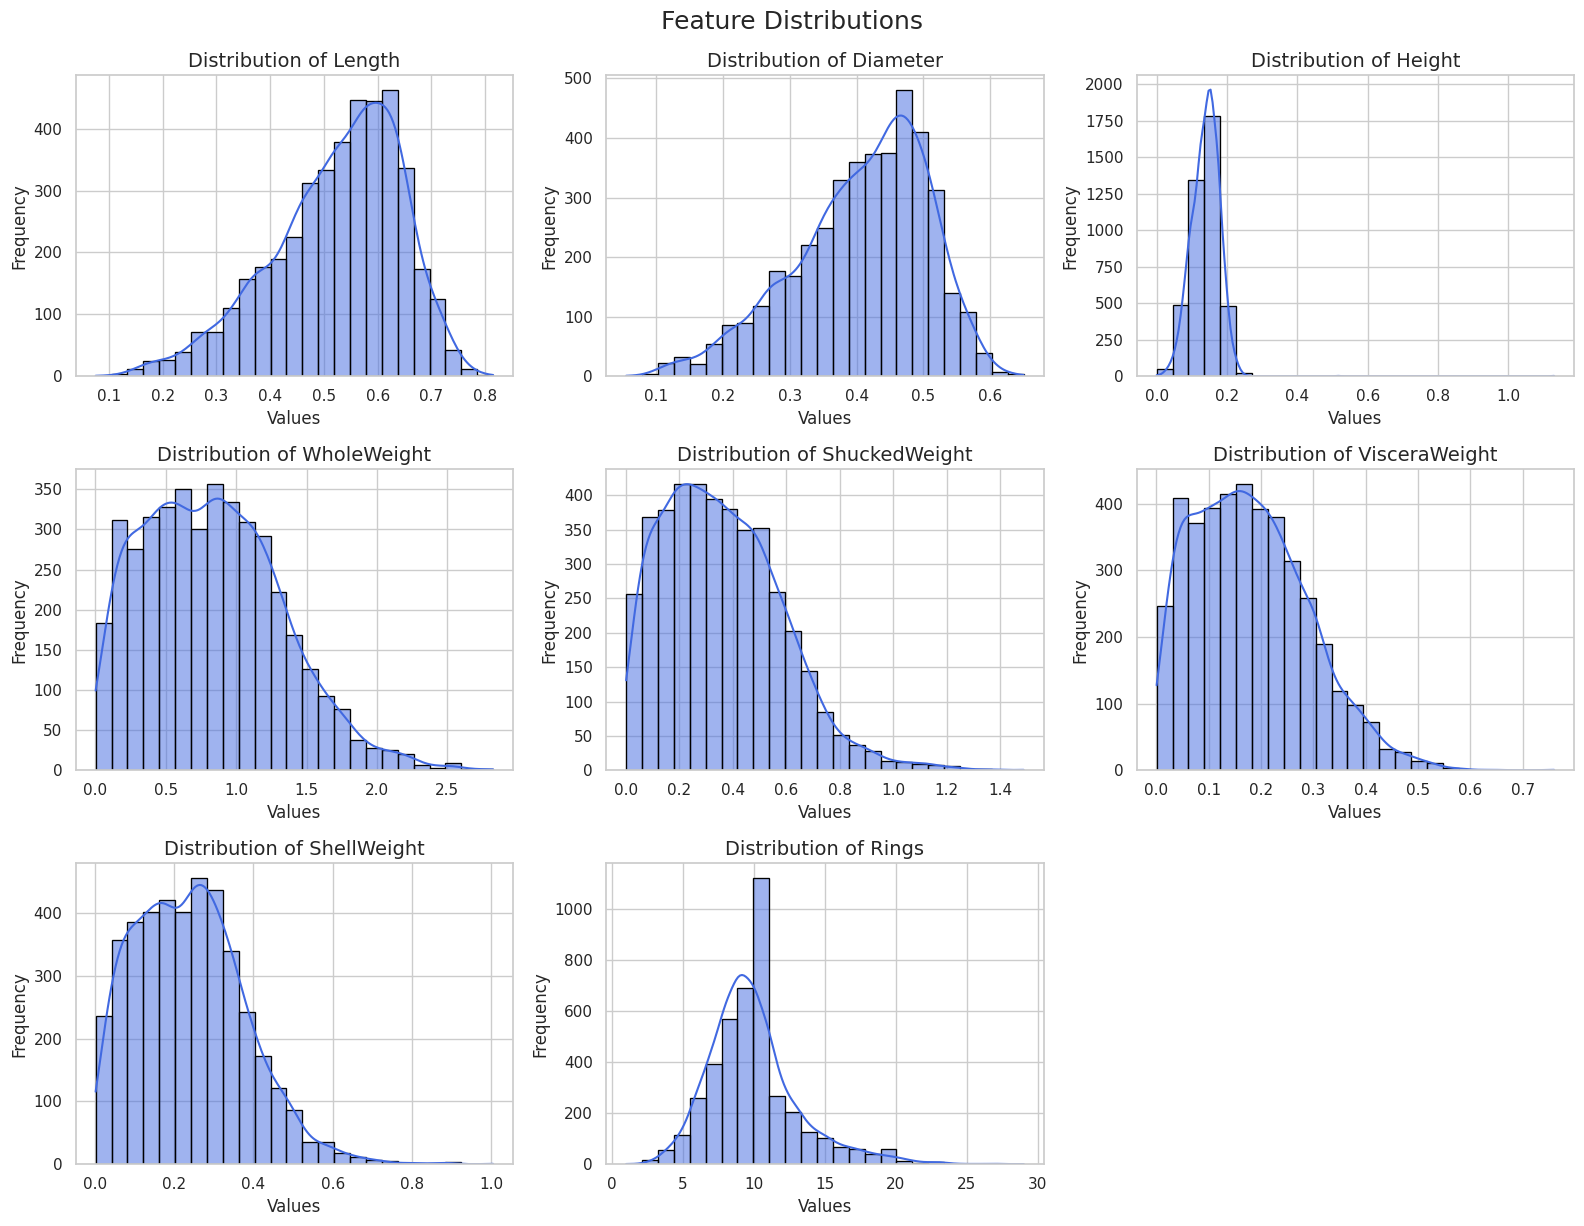

In [ ]:
sns.set_theme(style="whitegrid")

def plot_feature_distributions(data):
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns
    n = len(num_cols)
    rows = (n // 3) + 1

    plt.figure(figsize=(16, 4 * rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, 3, i)

        # Histogram + KDE
        sns.histplot(data[col], kde=True, bins=25, color="royalblue", edgecolor="black")

        # Title formatting
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xlabel("Values")
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.suptitle("Feature Distributions", fontsize=18, y=1.02)
    plt.savefig("feature_distributions_kde.png")
    plt.show()

plot_feature_distributions(data)


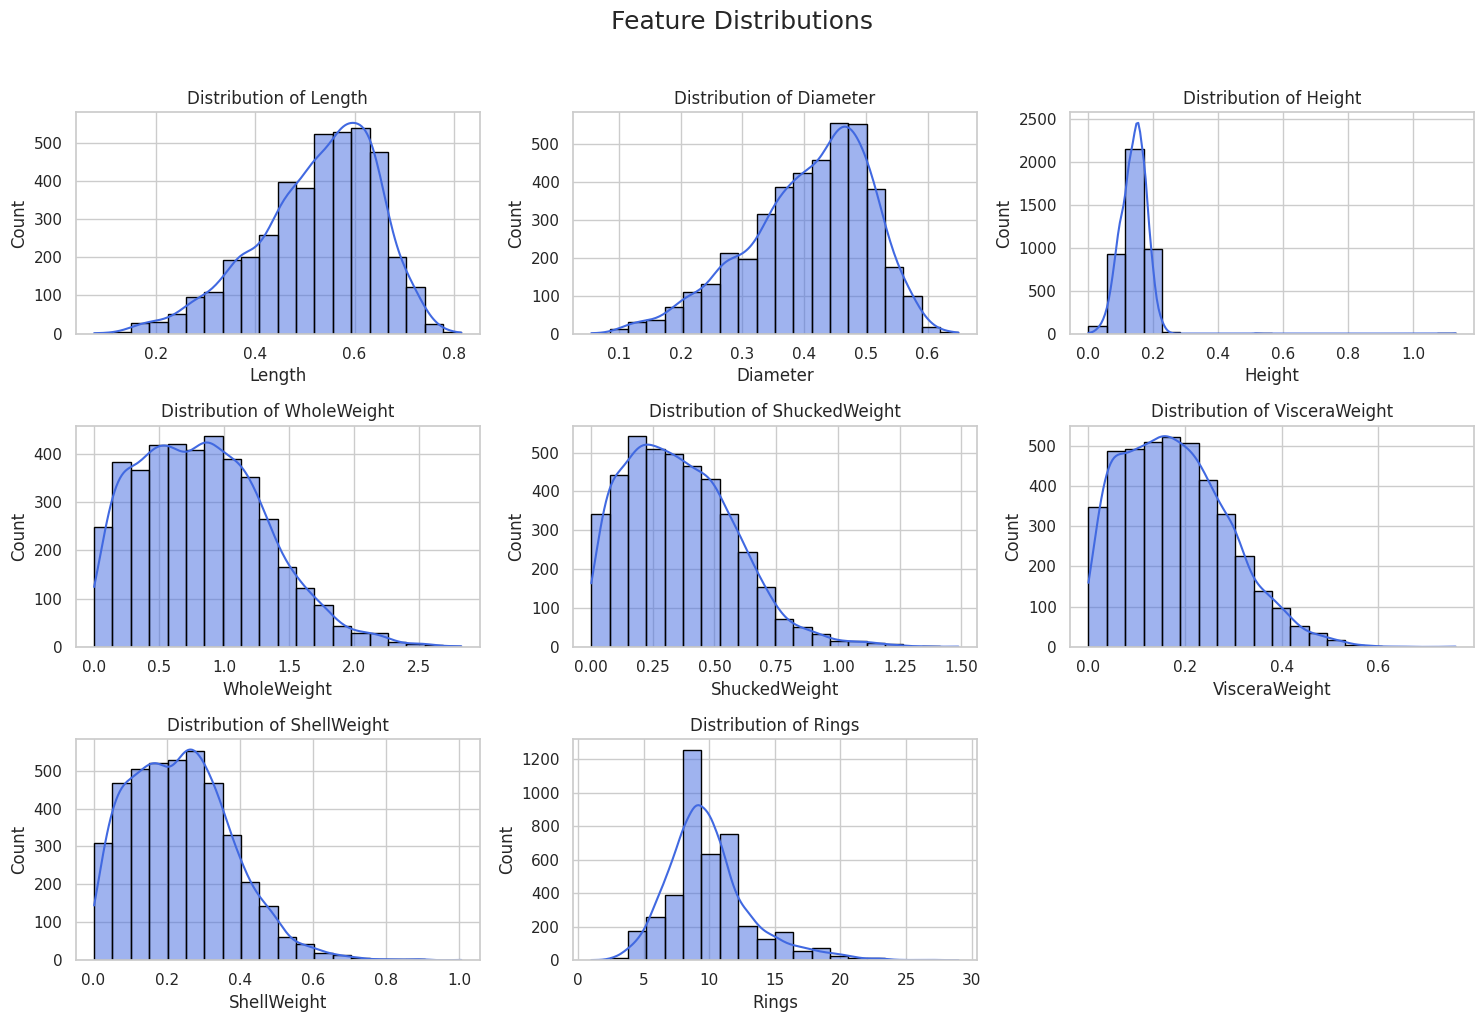

In [ ]:
continuous_features = ['Length', 'Diameter', 'Height',
    'WholeWeight', 'ShuckedWeight', 'VisceraWeight',
    'ShellWeight', 'Rings']



plt.figure(figsize=(15,10))

for i, col in enumerate(continuous_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True, bins=20, color= "royalblue",edgecolor="black")  # assign specific color
    plt.title(f'Distribution of {col}')
    plt.grid(True)

plt.suptitle("Feature Distributions", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig('Histogram.png')
plt.show()


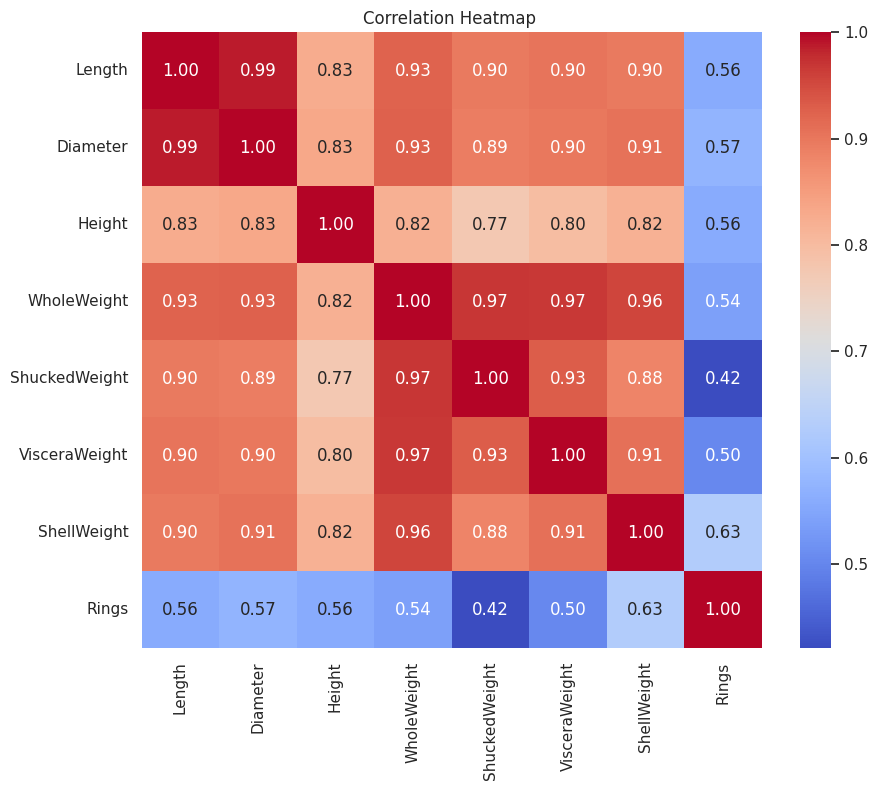

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap ")
plt.savefig("Crr Heat Map")
plt.show()


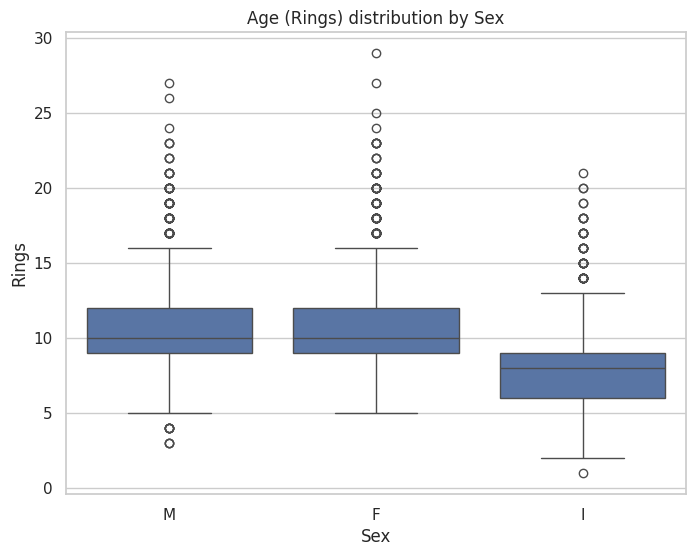

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='Rings', data=data)
plt.title("Age (Rings) distribution by Sex")
plt.show()

In [ ]:
data['Age'] = data['Rings'] + 1.5
data[['Rings', 'Age']].head()


,Rings,Age
0,15,16.5
1,7,8.5
2,9,10.5
3,10,11.5
4,7,8.5


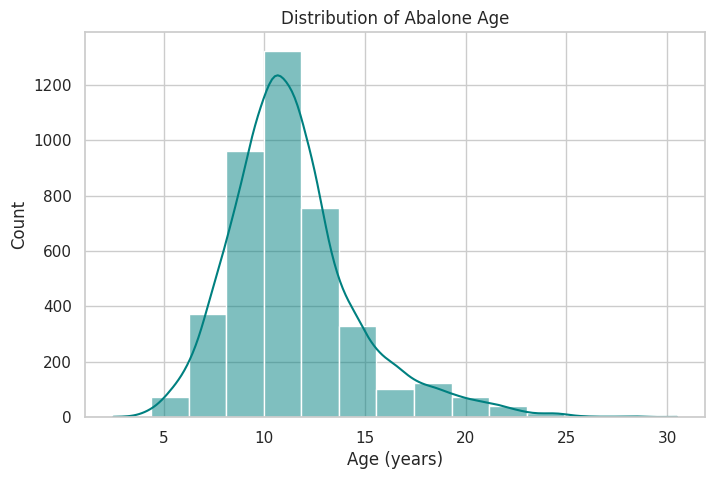

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=15, kde=True, color='teal')
plt.title('Distribution of Abalone Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.savefig("dist age")
plt.grid(True)
plt.show()



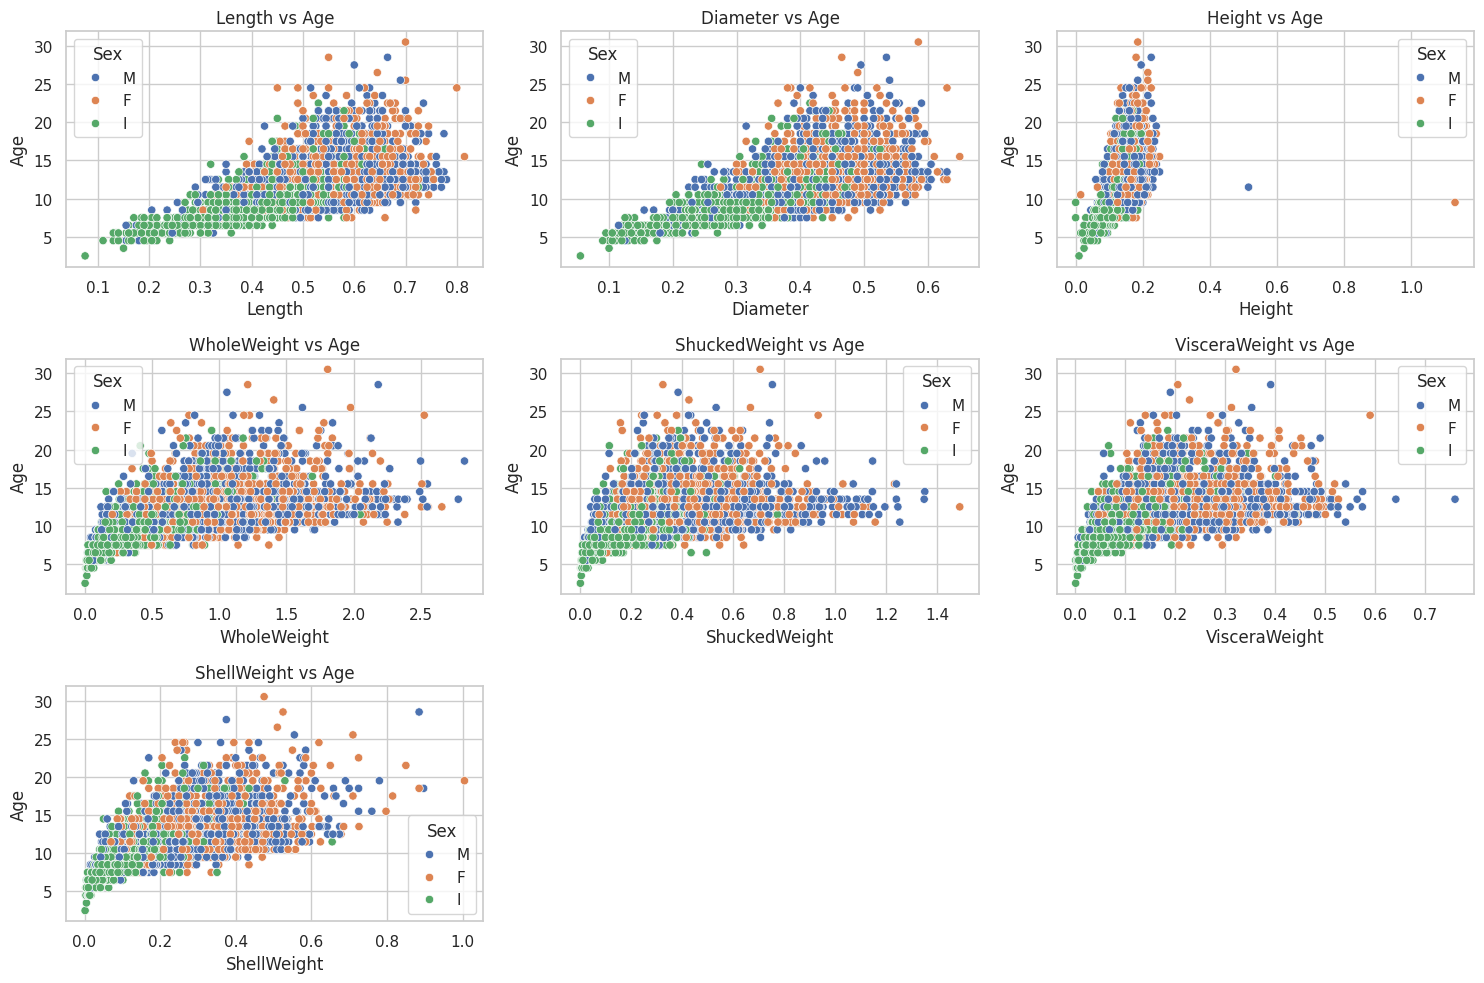

In [ ]:
features = ['Length', 'Diameter', 'Height',
            'WholeWeight', 'ShuckedWeight',
            'VisceraWeight', 'ShellWeight']


plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y='Age', hue='Sex', data=data)
    plt.title(f'{col} vs Age')
plt.tight_layout()

plt.show()

In [ ]:
corr = data.corr(numeric_only=True)['Age'].sort_values(ascending=False)
print("Feature Correlation with Age:")
print(corr)

Feature Correlation with Age:
Rings            1.000000
Age              1.000000
ShellWeight      0.627574
Diameter         0.574660
Height           0.557467
Length           0.556720
WholeWeight      0.540390
VisceraWeight    0.503819
ShuckedWeight    0.420884
Name: Age, dtype: float64


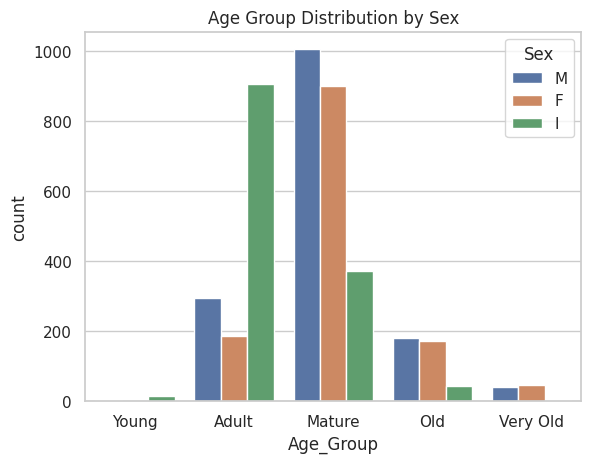

In [ ]:
bins = [0, 5, 10, 15, 20, 30]
labels = ['Young', 'Adult', 'Mature', 'Old', 'Very Old']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

sns.countplot(x='Age_Group', hue='Sex', data=data)
plt.title('Age Group Distribution by Sex')
plt.savefig("Age Group Dist by sex")
plt.show()


In [ ]:
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age,Age_Group
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,Old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,Adult
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,Mature
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,Mature
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,Adult
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,Mature
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,Mature
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,Mature
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,Mature


In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])
data['Age_Group'] = label.fit_transform(data['Age_Group'])


In [ ]:
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age,Age_Group
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,2
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,1
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,1
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,1


In [ ]:
X_feature = data[['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight',
        'ShuckedWeight', 'VisceraWeight', 'ShellWeight']]

Y_target = data['Age_Group']



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_feature,Y_target, test_size=0.2, random_state=42)

XGBoost Accuracy: 0.7105263157894737
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       276
           1       0.72      0.84      0.78       456
           2       0.33      0.15      0.21        80
           3       0.00      0.00      0.00        21
           4       0.20      0.33      0.25         3

    accuracy                           0.71       836
   macro avg       0.40      0.41      0.40       836
weighted avg       0.68      0.71      0.69       836



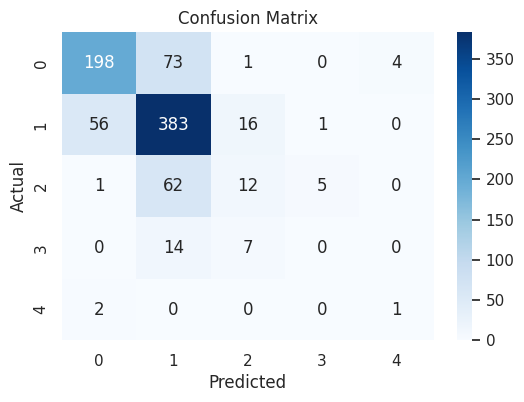

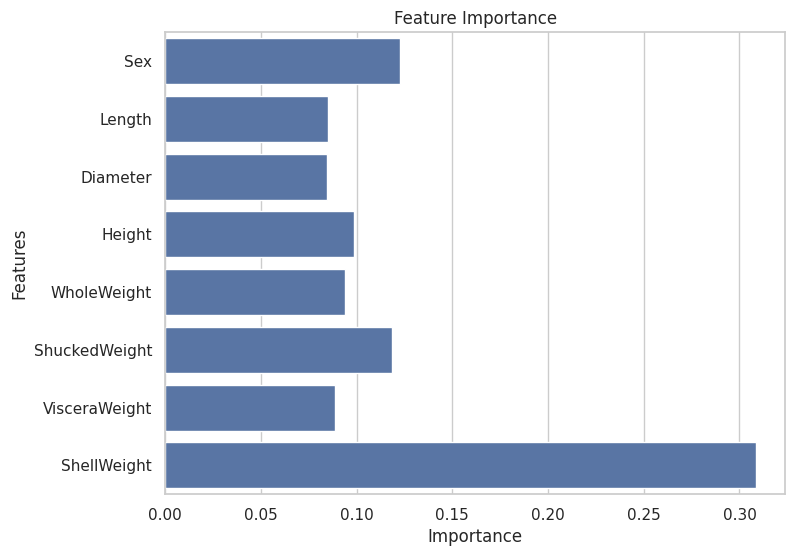

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Train model
xgb_clf = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42,
    eval_metric='mlogloss'
)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

#Accuracy
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Feature Importance
importances = xgb_clf.feature_importances_
feat_names = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


Logistic Regression Accuracy: 0.6973684210526315
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       276
           1       0.69      0.84      0.76       456
           2       0.50      0.05      0.09        80
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         3

    accuracy                           0.70       836
   macro avg       0.38      0.32      0.31       836
weighted avg       0.66      0.70      0.66       836



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


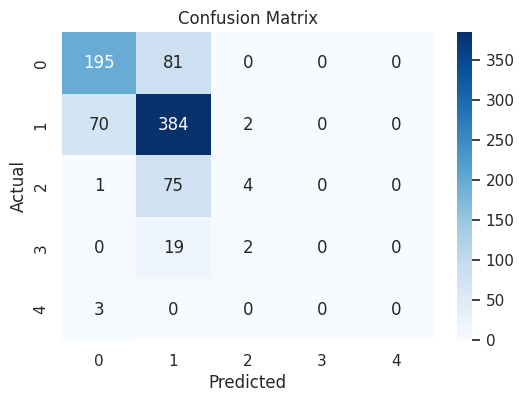

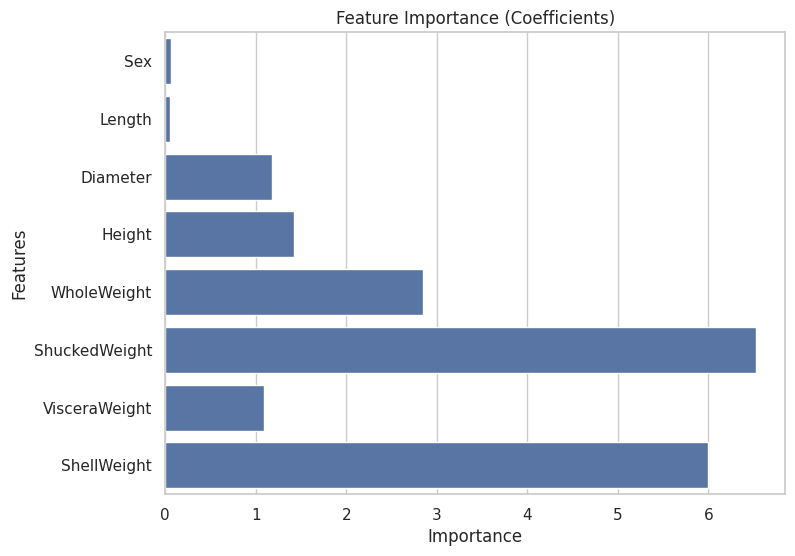

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Accuracy + Report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (Coefficients)
importances = abs(log_reg.coef_[0])  # absolute values of coefficients
feat_names = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


Random Forest Accuracy: 0.7260765550239234
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       276
           1       0.72      0.87      0.78       456
           2       0.42      0.12      0.19        80
           3       0.00      0.00      0.00        21
           4       0.50      0.33      0.40         3

    accuracy                           0.73       836
   macro avg       0.48      0.41      0.43       836
weighted avg       0.69      0.73      0.70       836



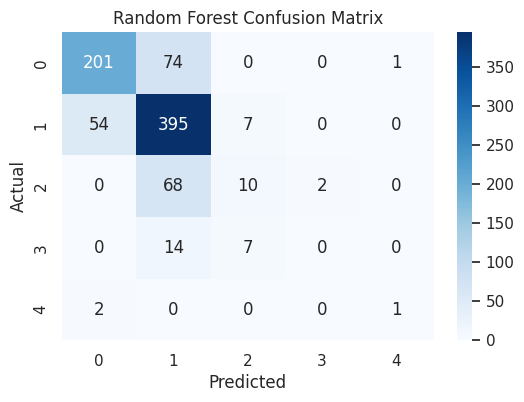

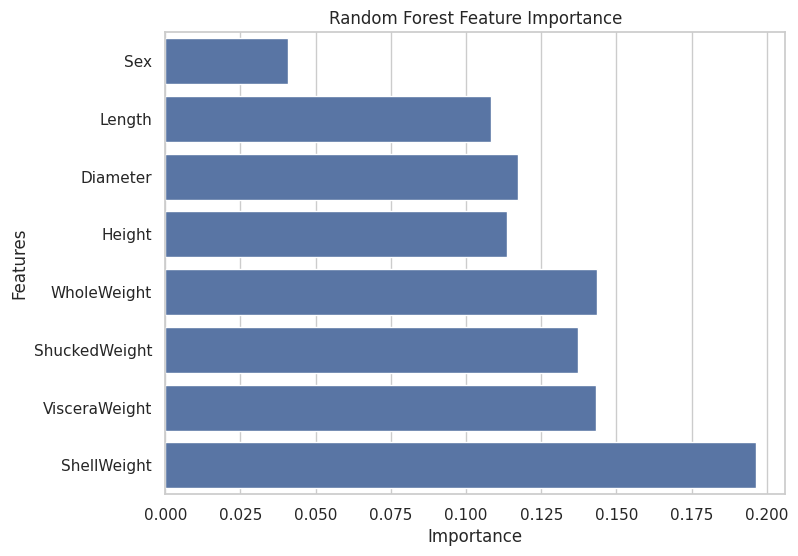

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Train Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = rf_clf.feature_importances_
feat_names = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Accuracy: 0.7296650717703349
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       276
           1       0.71      0.88      0.79       456
           2       0.37      0.09      0.14        80
           3       0.50      0.05      0.09        21
           4       0.50      0.33      0.40         3

    accuracy                           0.73       836
   macro avg       0.58      0.41      0.43       836
weighted avg       0.70      0.73      0.70       836



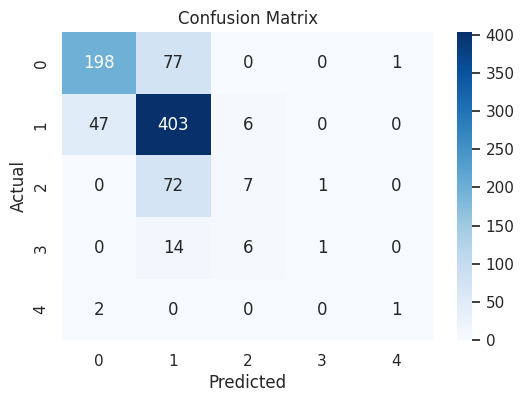

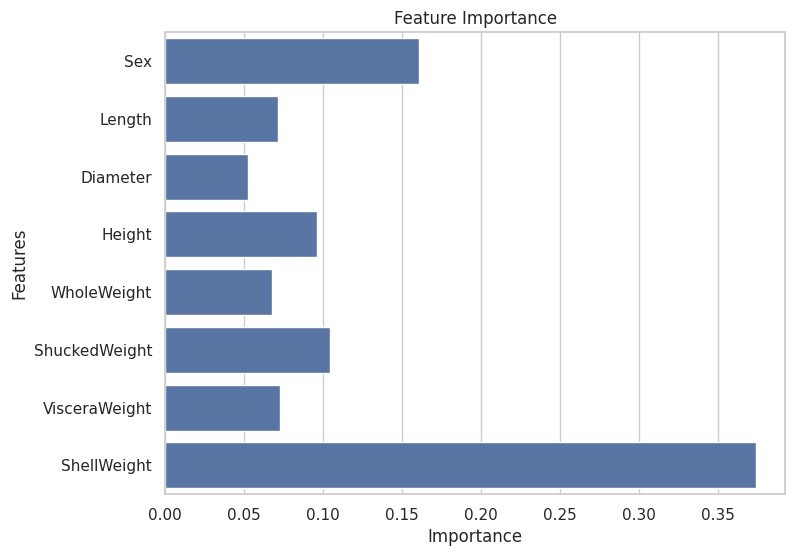

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Define the model
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [100, 200, 500],    # number of trees
    'max_depth': [3, 6, 9],             # max depth of each tree
    'learning_rate': [0.01, 0.05, 0.1], # step size shrinkage
    'subsample': [0.6, 0.8, 1.0]        # fraction of samples used per tree
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',  # use accuracy to select the best model
    cv=3,
)

#Fit the model
grid_search.fit(X_train, y_train)

#Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

#Predicting using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Accuracy Report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = best_model.feature_importances_
feat_names = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best hyperparameters: {'C': 10, 'penalty': 'l1'}
Logistic Regression Accuracy: 0.7081339712918661
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       276
           1       0.70      0.85      0.77       456
           2       0.53      0.11      0.19        80
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         3

    accuracy                           0.71       836
   macro avg       0.39      0.33      0.34       836
weighted avg       0.68      0.71      0.68       836



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


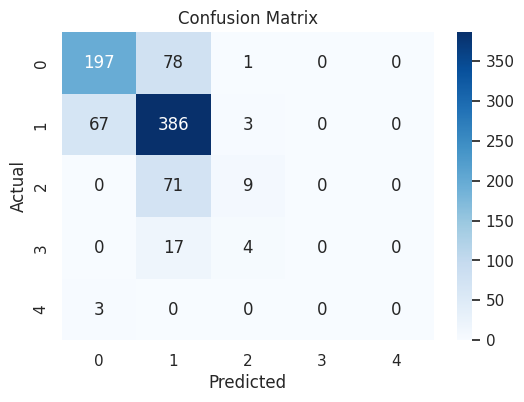

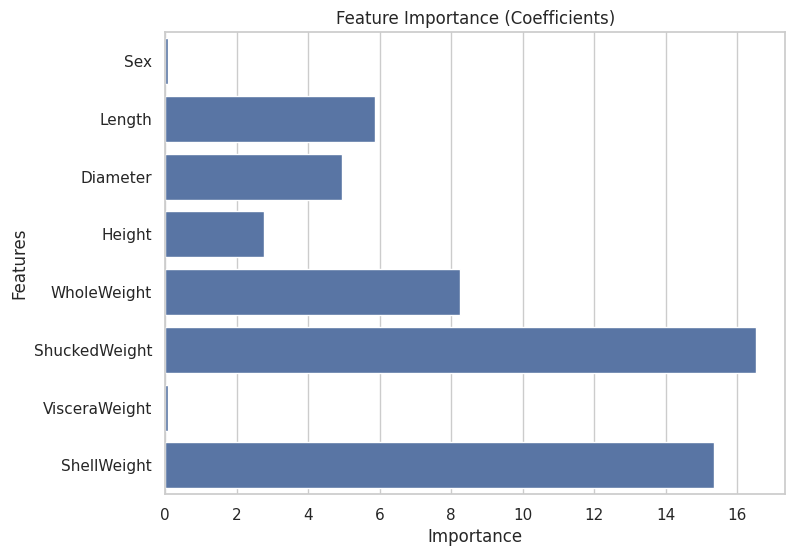

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Define the model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')  # solver liblinear works for small datasets

#arameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],       # regularization strength
    'penalty': ['l1', 'l2']        # type of regularization
}

#GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)

#Fiting the model
grid_search.fit(X_train, y_train)

#Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

#Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (Coefficients)
importances = abs(best_model.coef_[0])
feat_names = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest Accuracy: 0.722488038277512
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       276
           1       0.71      0.87      0.78       456
           2       0.36      0.11      0.17        80
           3       0.00      0.00      0.00        21
           4       0.50      0.33      0.40         3

    accuracy                           0.72       836
   macro avg       0.47      0.41      0.42       836
weighted avg       0.68      0.72      0.69       836



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


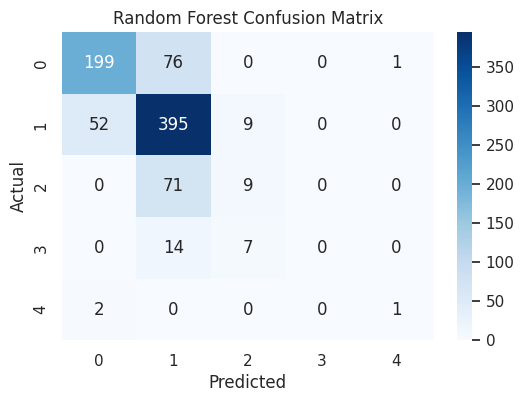

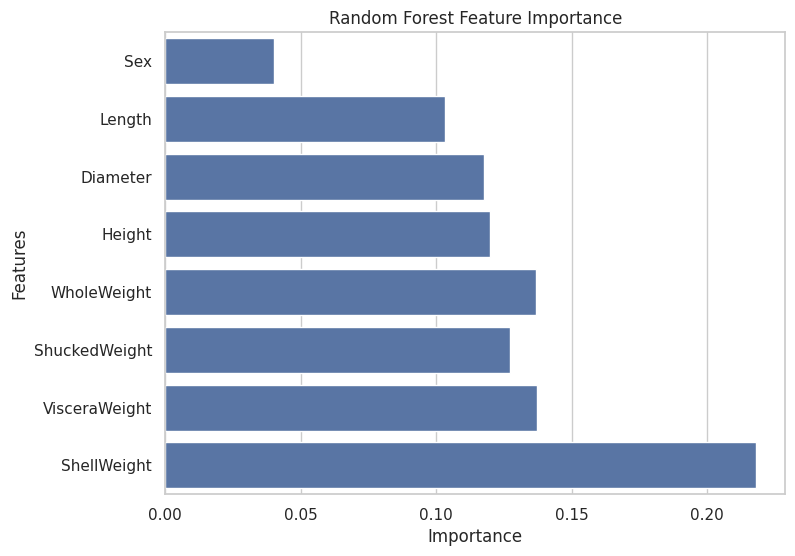

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Define the model
rf_clf = RandomForestClassifier(random_state=42)

#hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],   # number of trees
    'max_depth': [None, 5, 10],        # max depth of trees
    'min_samples_split': [2, 5, 10],   # minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # minimum samples required at a leaf node
}

#GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)

#Fiting the model
grid_search.fit(X_train, y_train)

#Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

#Predicting using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Accuracy and Report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Feature Importance
importances = best_model.feature_importances_
feat_names = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
